## Ex2.1 Summary Statistics

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
x = np.asarray([-0.68, -2.11, 2.39, 0.26, 1.46, 1.33, -0.41, -0.33, 0.47])
x.mean(), x.std(ddof=1), np.median(x), x.max() - x.min()

(0.2644444444444444, 1.3445827522981908, 0.26, 4.5)

In [8]:
# Unbiased and Biased estimate of std
unbiased = x.std(ddof=0)
biased = x.std(ddof=1)

## Measures of similarity

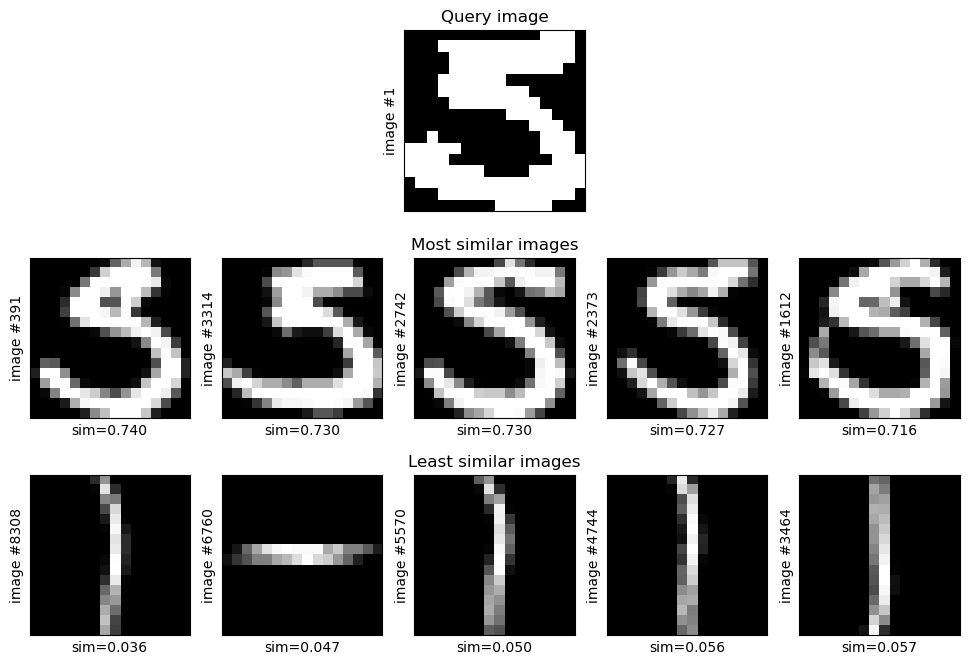

In [10]:
import importlib_resources
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

from dtuimldmtools import similarity

filename = importlib_resources.files("dtuimldmtools").joinpath("data/digits.mat")
# Image to use as query
i = 1

# Similarity: 'SMC', 'Jaccard', 'ExtendedJaccard', 'Cosine', 'Correlation'
similarity_measure = "Jaccard"

# Load the digits
# Load Matlab data file to python dict structure
X = loadmat(filename)["X"]
# You can also try the CBCL faces dataset (remember to change 'transpose')
# X = loadmat('../Data/wildfaces_grayscale.mat')['X']
N, M = X.shape
transpose = False  # should the plotted images be transposed?


# Search the face database for similar faces
# Index of all other images than i
noti = list(range(0, i)) + list(range(i + 1, N))
# Compute similarity between image i and all others
sim = similarity(X[i, :], X[noti, :], similarity_measure)
sim = sim.tolist()[0]
# Tuples of sorted similarities and their indices
sim_to_index = sorted(zip(sim, noti))

# Visualize query image and 5 most/least similar images
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)

img_hw = int(np.sqrt(len(X[0])))
img = np.reshape(X[i], (img_hw, img_hw))
if transpose:
    img = img.T
plt.imshow(img, cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.title("Query image")
plt.ylabel("image #{0}".format(i))


for ms in range(5):

    # 5 most similar images found
    plt.subplot(3, 5, 6 + ms)
    im_id = sim_to_index[-ms - 1][1]
    im_sim = sim_to_index[-ms - 1][0]
    img = np.reshape(X[im_id], (img_hw, img_hw))
    if transpose:
        img = img.T
    plt.imshow(img, cmap=plt.cm.gray)
    plt.xlabel("sim={0:.3f}".format(im_sim))
    plt.ylabel("image #{0}".format(im_id))
    plt.xticks([])
    plt.yticks([])
    if ms == 2:
        plt.title("Most similar images")

    # 5 least similar images found
    plt.subplot(3, 5, 11 + ms)
    im_id = sim_to_index[ms][1]
    im_sim = sim_to_index[ms][0]
    img = np.reshape(X[im_id], (img_hw, img_hw))
    if transpose:
        img = img.T
    plt.imshow(img, cmap=plt.cm.gray)
    plt.xlabel("sim={0:.3f}".format(im_sim))
    plt.ylabel("image #{0}".format(im_id))
    plt.xticks([])
    plt.yticks([])
    if ms == 2:
        plt.title("Least similar images")

plt.show()

## Ex 2.2.2 Scaling and transformation on similarity measurements

In [11]:
# exercise 2.2.2
import numpy as np

from dtuimldmtools import similarity

# Generate two data objects with M random attributes
M = 5
x = np.random.rand(1, M)
y = np.random.rand(1, M)

# Two constants
a = 1.5
b = 1.5

# Check the statements in the exercise
print(
    "Cosine scaling: %.4f "
    % (similarity(x, y, "cos") - similarity(a * x, y, "cos"))[0, 0]
)
print(
    "ExtendedJaccard scaling: %.4f "
    % (similarity(x, y, "ext") - similarity(a * x, y, "ext"))[0, 0]
)
print(
    "Correlation scaling: %.4f "
    % (similarity(x, y, "cor") - similarity(a * x, y, "cor"))[0, 0]
)
print(
    "Cosine translation: %.4f "
    % (similarity(x, y, "cos") - similarity(b + x, y, "cos"))[0, 0]
)
print(
    "ExtendedJaccard translation: %.4f "
    % (similarity(x, y, "ext") - similarity(b + x, y, "ext"))[0, 0]
)
#TODO help
print(
    "Correlation translation: %.4f "
    % (similarity(x, y, "cor") - similarity(b + x, y, "cor"))[0, 0]
)

Cosine scaling: 0.0000 
ExtendedJaccard scaling: 0.1647 
Correlation scaling: 0.0000 
Cosine translation: 0.0690 
ExtendedJaccard translation: 0.5830 
Correlation translation: 0.0000 
Ran Exercise 2.2.2


## Iris

In [12]:
import importlib_resources
import numpy as np
import xlrd

filename = importlib_resources.files("dtuimldmtools").joinpath("data/iris.xls")
# Load xls sheet with data
doc = xlrd.open_workbook(filename).sheet_by_index(0)

# Extract attribute names
attributeNames = doc.row_values(0, 0, 4)

# Extract class names to python list,
# then encode with integers (dict)
classLabels = doc.col_values(4, 1, 151)
classNames = sorted(set(classLabels))
classDict = dict(zip(classNames, range(len(classNames))))

# Extract vector y, convert to NumPy matrix and transpose
y = np.array([classDict[value] for value in classLabels])

# Preallocate memory, then extract data to matrix X
X = np.empty((150, 4))
for i in range(4):
    X[:, i] = np.array(doc.col_values(i, 1, 151)).T

# Compute values of N, M and C.
N = len(y)
M = len(attributeNames)
C = len(classNames)

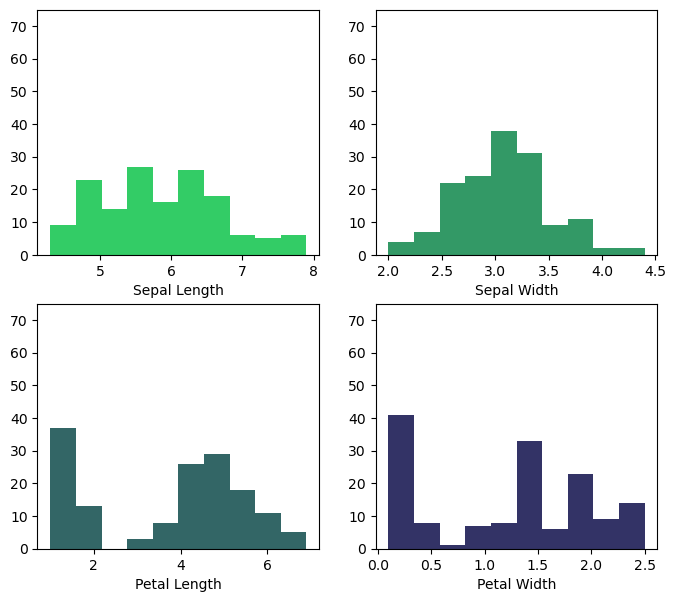

In [13]:
plt.figure(figsize=(8, 7))
u = np.floor(np.sqrt(M))
v = np.ceil(float(M) / u)
for i in range(M):
    plt.subplot(int(u), int(v), i + 1)
    plt.hist(X[:, i], color=(0.2, 0.8 - i * 0.2, 0.4))
    plt.xlabel(attributeNames[i])
    plt.ylim(0, N / 2)

plt.show()

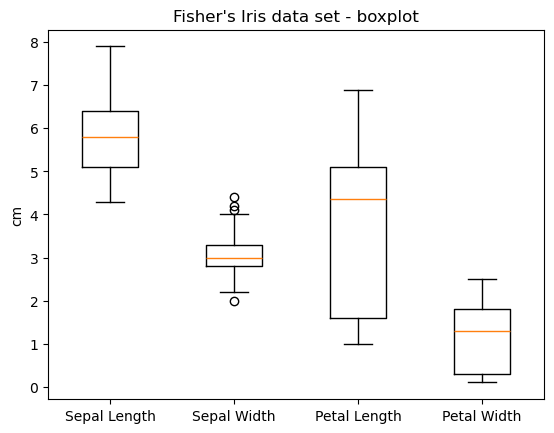

In [14]:
plt.figure()
plt.boxplot(X)
plt.xticks(range(1, 5), attributeNames)
plt.ylabel("cm")
plt.title("Fisher's Iris data set - boxplot")
plt.show()

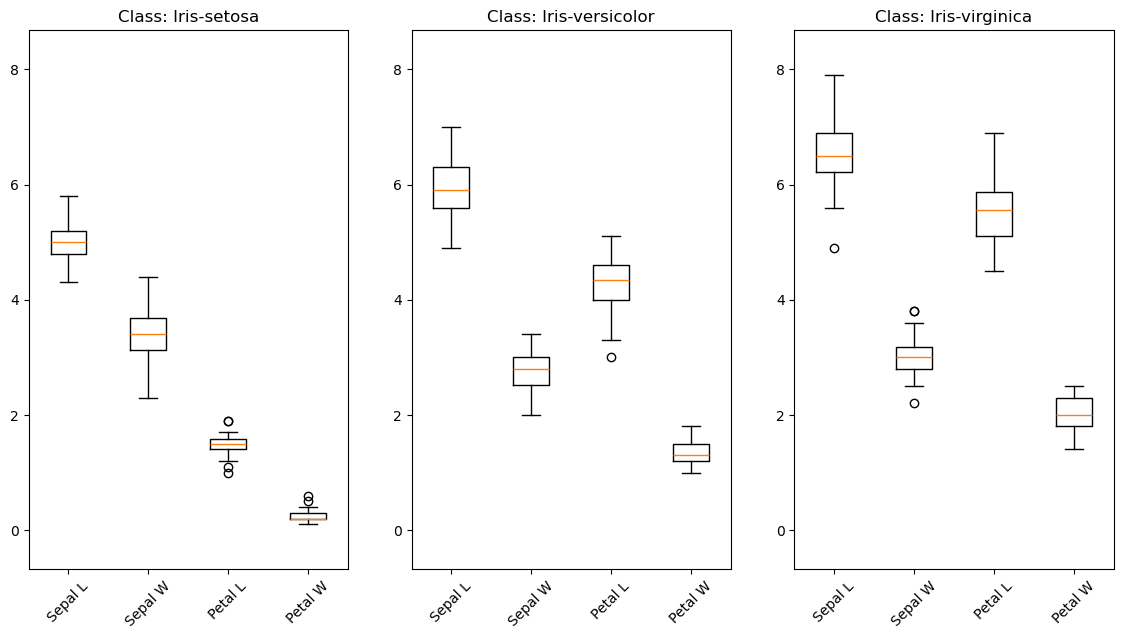

In [15]:
plt.figure(figsize=(14, 7))
for c in range(C):
    plt.subplot(1, C, c + 1)
    class_mask = y == c  # binary mask to extract elements of class c
    # or: class_mask = nonzero(y==c)[0].tolist()[0] # indices of class c

    plt.boxplot(X[class_mask, :])
    # title('Class: {0}'.format(classNames[c]))
    plt.title("Class: " + classNames[c])
    plt.xticks(
        range(1, len(attributeNames) + 1), [a[:7] for a in attributeNames], rotation=45
    )
    y_up = X.max() + (X.max() - X.min()) * 0.1
    y_down = X.min() - (X.max() - X.min()) * 0.1
    plt.ylim(y_down, y_up)

plt.show()

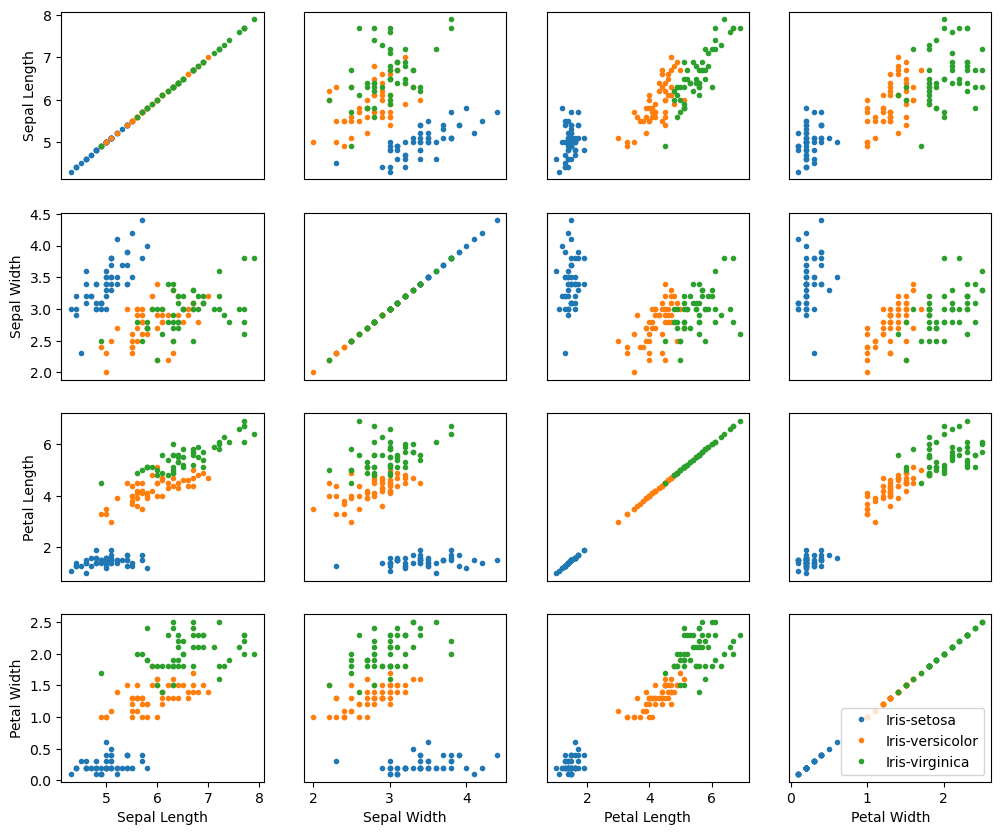

In [16]:
plt.figure(figsize=(12, 10))
for m1 in range(M):
    for m2 in range(M):
        plt.subplot(M, M, m1 * M + m2 + 1)
        for c in range(C):
            class_mask = y == c
            plt.plot(np.array(X[class_mask, m2]), np.array(X[class_mask, m1]), ".")
            if m1 == M - 1:
                plt.xlabel(attributeNames[m2])
            else:
                plt.xticks([])
            if m2 == 0:
                plt.ylabel(attributeNames[m1])
            else:
                plt.yticks([])

plt.legend(classNames)

plt.show()

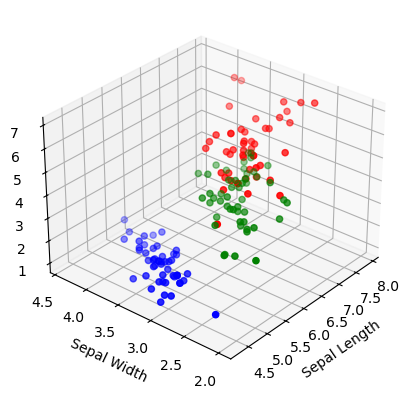

In [17]:
from mpl_toolkits.mplot3d import Axes3D

# Indices of the variables to plot
ind = [0, 1, 2]
colors = ["blue", "green", "red"]

f = plt.figure()
ax = f.add_subplot(111, projection="3d")  # Here the mpl_toolkits is used
for c in range(C):
    class_mask = y == c
    s = ax.scatter(
        X[class_mask, ind[0]], X[class_mask, ind[1]], X[class_mask, ind[2]], c=colors[c]
    )

ax.view_init(30, 220)
ax.set_xlabel(attributeNames[ind[0]])
ax.set_ylabel(attributeNames[ind[1]])
ax.set_zlabel(attributeNames[ind[2]])

plt.show()

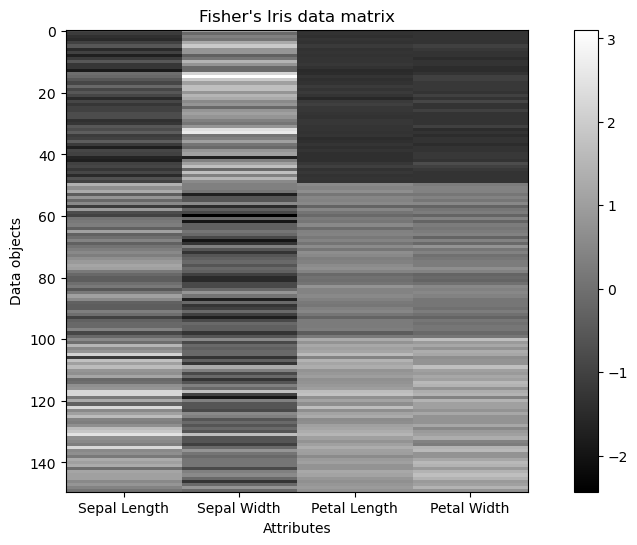

In [18]:
from scipy.stats import zscore

X_standarized = zscore(X, ddof=1)

plt.figure(figsize=(12, 6))
plt.imshow(X_standarized, interpolation="none", aspect=(4.0 / N), cmap=plt.cm.gray)
plt.xticks(range(4), attributeNames)
plt.xlabel("Attributes")
plt.ylabel("Data objects")
plt.title("Fisher's Iris data matrix")
plt.colorbar()

plt.show()

## Wine

Data loaded


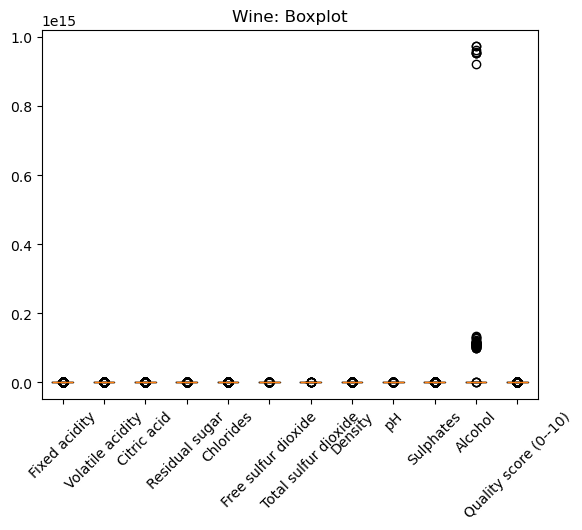

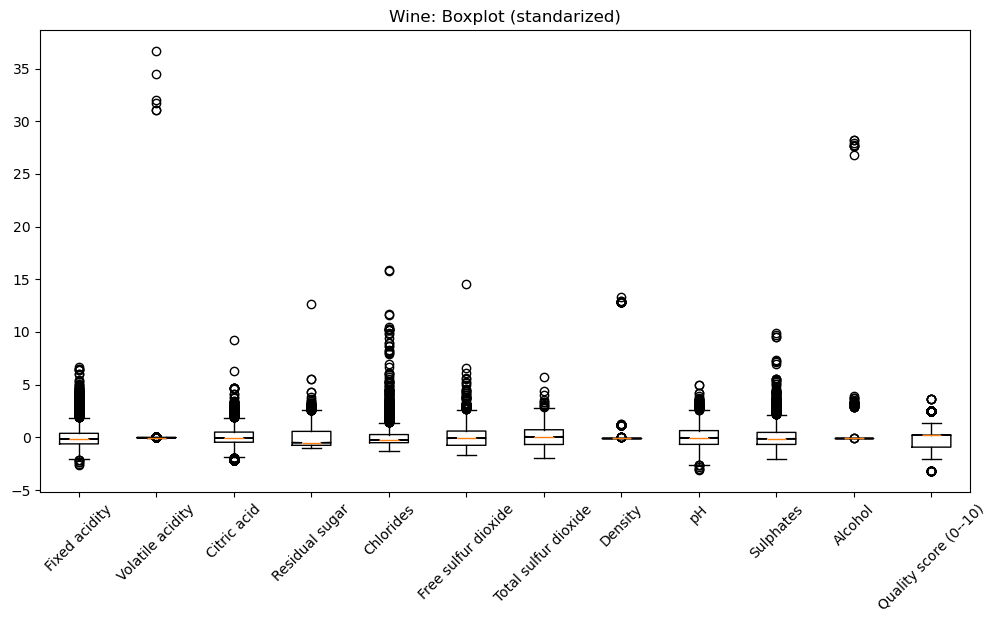

In [1]:
"""
Note: This is a long script. You may want to use breakpoints 
"""

import importlib_resources
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.stats import zscore

filename = importlib_resources.files("dtuimldmtools").joinpath("data/wine.mat")

# Load Matlab data file and extract variables of interest
mat_data = loadmat(filename)
X = mat_data["X"]
y = mat_data["y"].squeeze()
C = mat_data["C"][0, 0]
M = mat_data["M"][0, 0]
N = mat_data["N"][0, 0]
attributeNames = [name[0][0] for name in mat_data["attributeNames"]]
classNames = [cls[0][0] for cls in mat_data["classNames"]]

print("Data loaded")

# We start with a box plot of each attribute
plt.figure()
plt.title("Wine: Boxplot")
plt.boxplot(X)
plt.xticks(range(1, M + 1), attributeNames, rotation=45)

# From this it is clear that there are some outliers in the Alcohol
# attribute (10x10^14 is clearly not a proper value for alcohol content)
# However, it is impossible to see the distribution of the data, because
# the axis is dominated by these extreme outliers. To avoid this, we plot a
# box plot of standardized data (using the zscore function).
plt.figure(figsize=(12, 6))
plt.title("Wine: Boxplot (standarized)")
plt.boxplot(zscore(X, ddof=1), attributeNames)
plt.xticks(range(1, M + 1), attributeNames, rotation=45)

# This plot reveals that there are clearly some outliers in the Volatile
# acidity, Density, and Alcohol attributes, i.e. attribute number 2, 8,
# and 11.
plt.show()

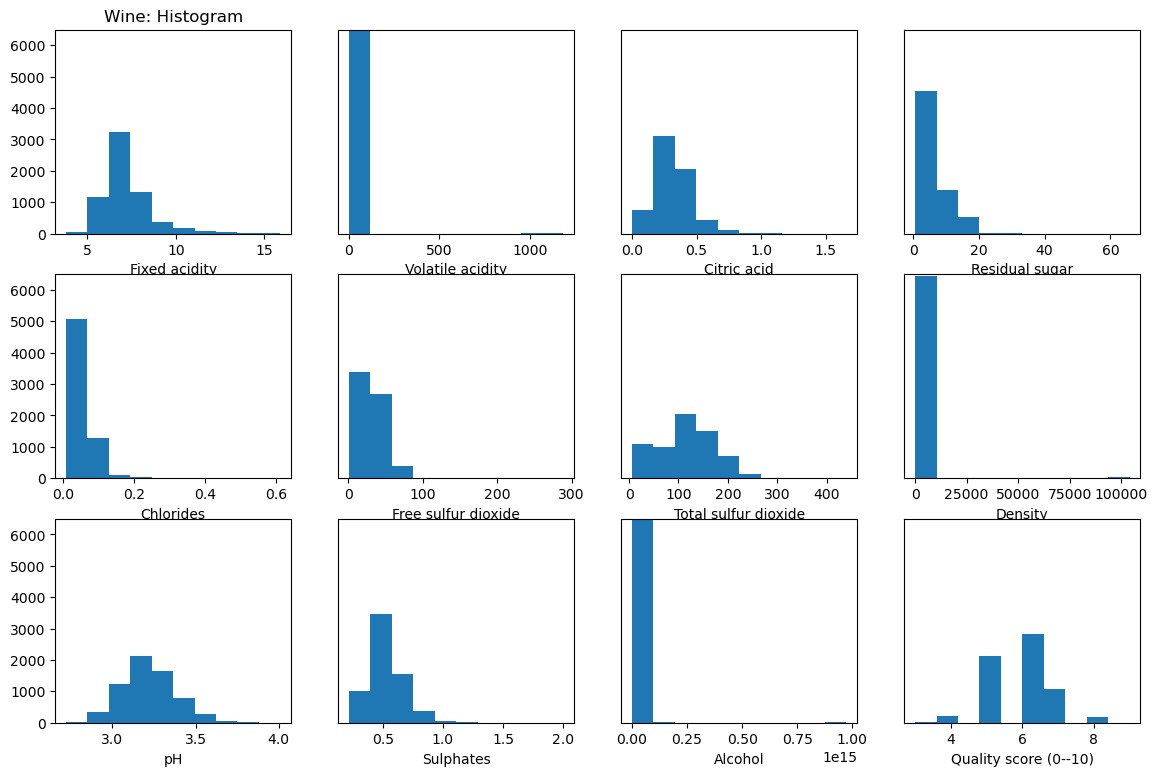

In [3]:
# Next, we plot histograms of all attributes.
plt.figure(figsize=(14, 9))
u = np.floor(np.sqrt(M))
v = np.ceil(float(M) / u)
for i in range(M):
    plt.subplot(int(u), int(v), i + 1)
    plt.hist(X[:, i])
    plt.xlabel(attributeNames[i])
    plt.ylim(0, N)  # Make the y-axes equal for improved readability
    if i % v != 0:
        plt.yticks([])
    if i == 0:
        plt.title("Wine: Histogram")

plt.show()
# This confirms our belief about outliers in attributes 2, 8, and 11.
# To take a closer look at this, we next plot histograms of the
# attributes we suspect contains outliers

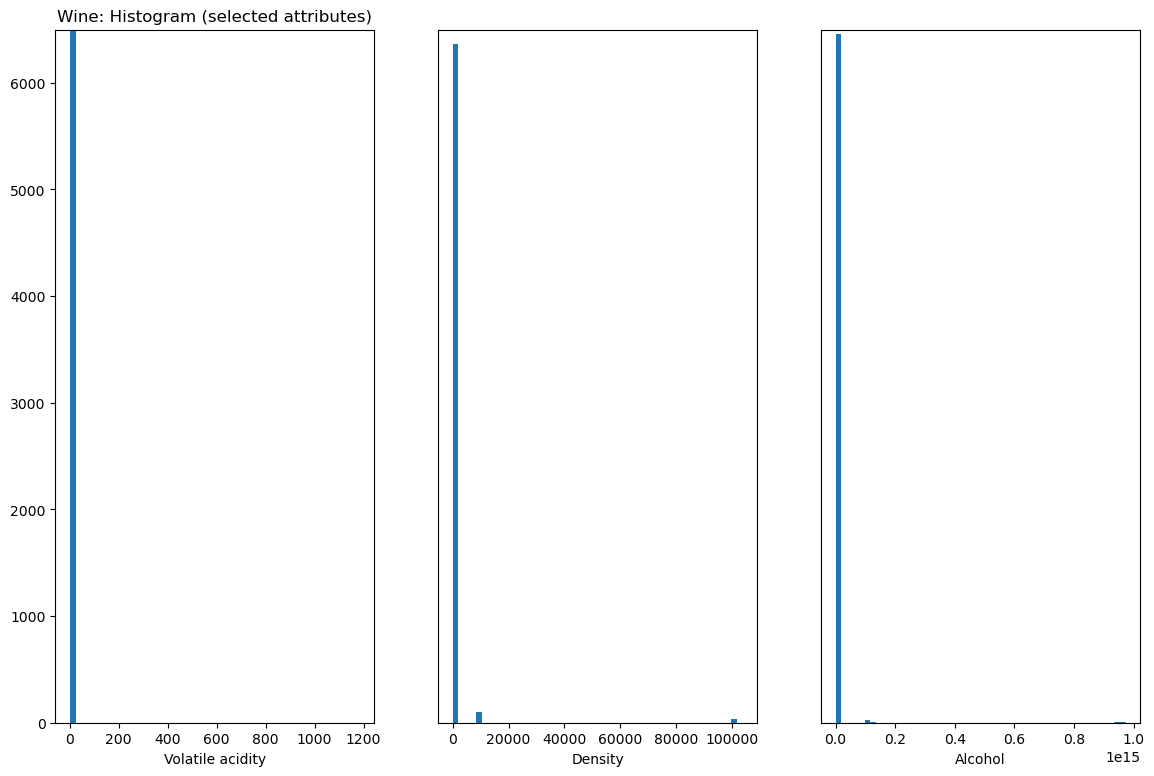

In [4]:
plt.figure(figsize=(14, 9))
m = [1, 7, 10]
for i in range(len(m)):
    plt.subplot(1, len(m), i + 1)
    plt.hist(X[:, m[i]], 50)
    plt.xlabel(attributeNames[m[i]])
    plt.ylim(0, N)  # Make the y-axes equal for improved readability
    if i > 0:
        plt.yticks([])
    if i == 0:
        plt.title("Wine: Histogram (selected attributes)")

plt.show()

# The histograms show that there are a few very extreme values in these
# three attributes. To identify these values as outliers, we must use our
# knowledge about the data set and the attributes. Say we expect volatide
# acidity to be around 0-2 g/dm^3, density to be close to 1 g/cm^3, and
# alcohol percentage to be somewhere between 5-20 % vol. Then we can safely
# identify the following outliers, which are a factor of 10 greater than
# the largest we expect.

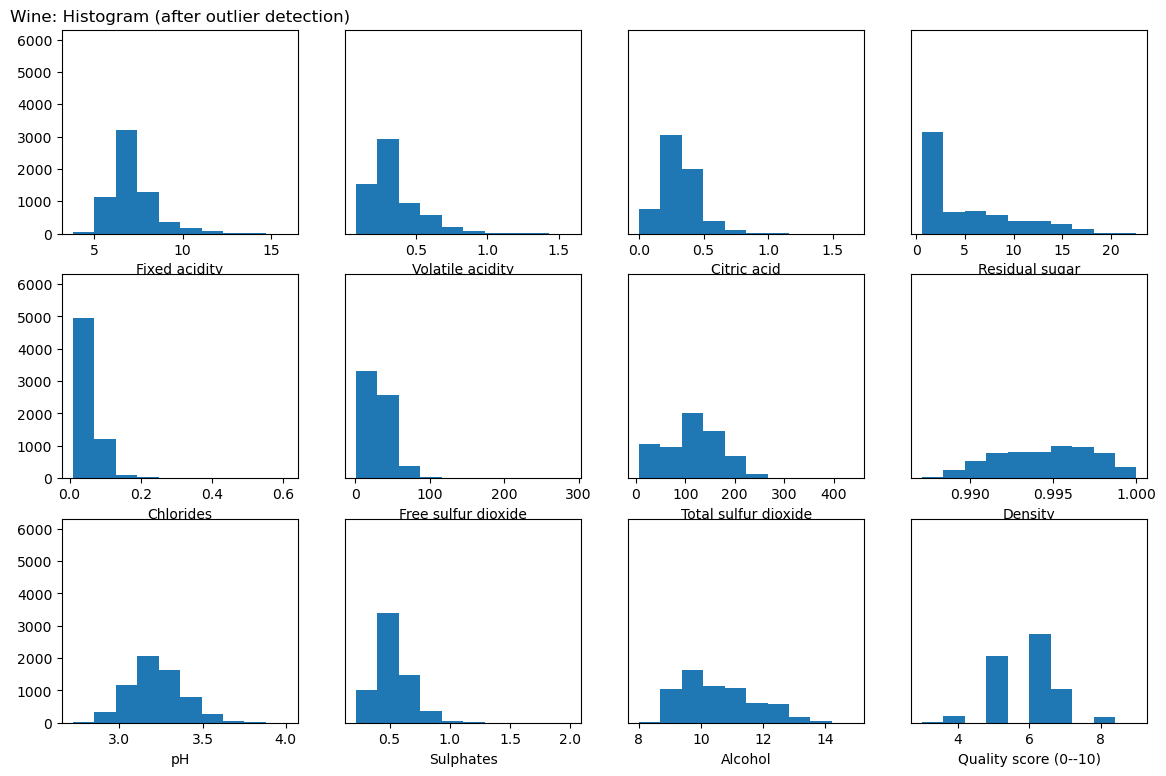

In [5]:

outlier_mask = (X[:, 1] > 20) | (X[:, 7] > 10) | (X[:, 10] > 200)
valid_mask = np.logical_not(outlier_mask)

# Finally we will remove these from the data set
X = X[valid_mask, :]
y = y[valid_mask]
N = len(y)

# Now, we can repeat the process to see if there are any more outliers
# present in the data. We take a look at a histogram of all attributes:
plt.figure(figsize=(14, 9))
u = np.floor(np.sqrt(M))
v = np.ceil(float(M) / u)
for i in range(M):
    plt.subplot(int(u), int(v), i + 1)
    plt.hist(X[:, i])
    plt.xlabel(attributeNames[i])
    plt.ylim(0, N)  # Make the y-axes equal for improved readability
    if i % v != 0:
        plt.yticks([])
    if i == 0:
        plt.title("Wine: Histogram (after outlier detection)")

# This reveals no further outliers, and we conclude that all outliers have
# been detected and removed.

plt.show()

You can use your solutions to the previous exercise as a starting point for making your visual-
izations.
· Say you want to find all data objects for which the alcohol percentage (attribute number 11)
is not greater than 100%. You can mask them simply as mask=(X[:,10]<=100).
· You can use the mask to eliminate the outlier observations (rows of data matrix). For instance
you can write X=X[mask,:] where mask indicates the data objects that should be maintained.
Remember also to remove them from the class index vector, y=y[mask,1] and to recompute N.

['Red', 'White']


/tmp/ipykernel_2171152/3004655017.py:53: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(


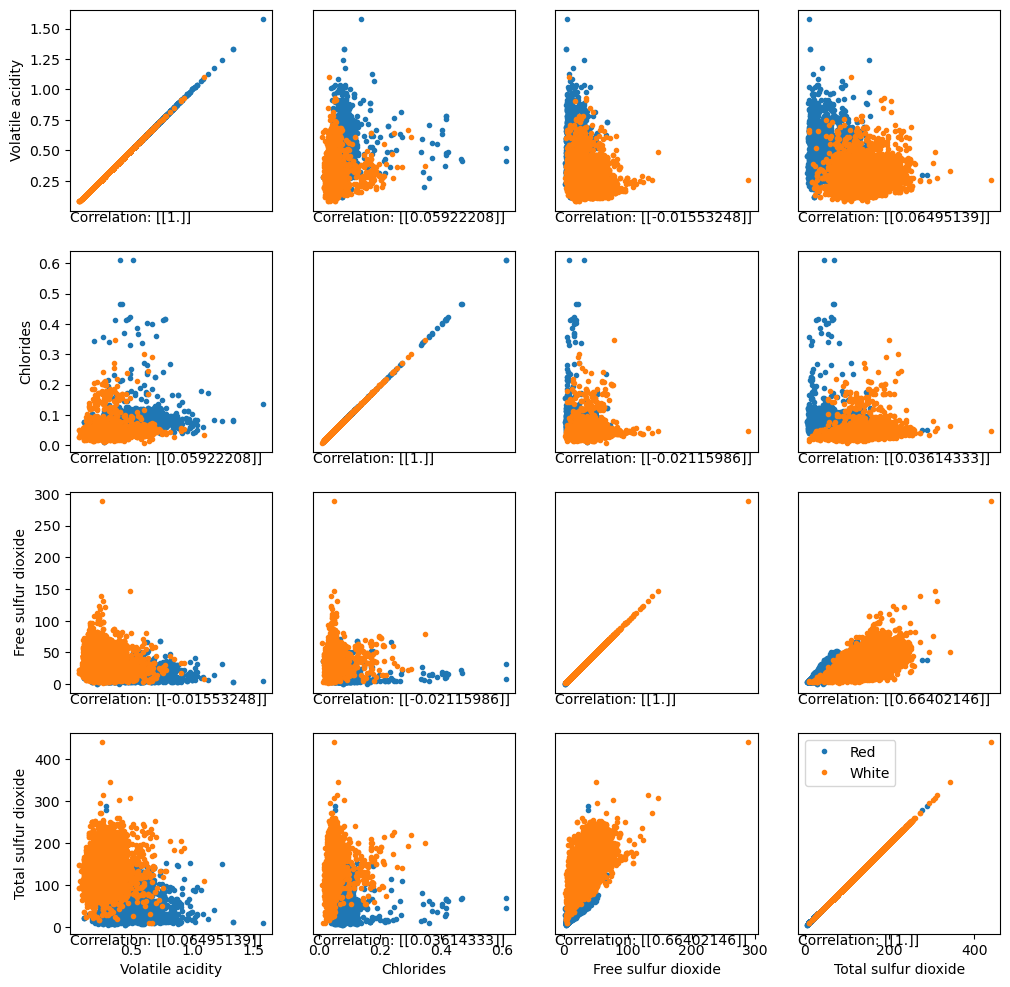

In [25]:
import importlib_resources
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.stats import zscore
from dtuimldmtools import similarity

filename = importlib_resources.files("dtuimldmtools").joinpath("data/wine.mat")

# Load Matlab data file and extract variables of interest
mat_data = loadmat(filename)
X = mat_data["X"]
y = np.squeeze(mat_data["y"])
C = mat_data["C"][0, 0]
M = mat_data["M"][0, 0]
N = mat_data["N"][0, 0]

attributeNames = [name[0][0] for name in mat_data["attributeNames"]]
classNames = [cls[0] for cls in mat_data["classNames"][0]]
print(classNames)
# The histograms show that there are a few very extreme values in these
# three attributes. To identify these values as outliers, we must use our
# knowledge about the data set and the attributes. Say we expect volatide
# acidity to be around 0-2 g/dm^3, density to be close to 1 g/cm^3, and
# alcohol percentage to be somewhere between 5-20 % vol. Then we can safely
# identify the following outliers, which are a factor of 10 greater than
# the largest we expect.
outlier_mask = (X[:, 1] > 20) | (X[:, 7] > 10) | (X[:, 10] > 200)
valid_mask = np.logical_not(outlier_mask)

# Finally we will remove these from the data set
X = X[valid_mask, :]
y = y[valid_mask]
N = len(y)
Xnorm = zscore(X, ddof=1)

## Next we plot a number of atttributes
Attributes = [1, 4, 5, 6]
NumAtr = len(Attributes)

plt.figure(figsize=(12, 12))
for m1 in range(NumAtr):
    for m2 in range(NumAtr):
        plt.subplot(NumAtr, NumAtr, m1 * NumAtr + m2 + 1)
        for c in range(C):
            class_mask = y == c
            # Plotting all attributes in m2 for each class against a single attribute m1
            plt.plot(X[class_mask, Attributes[m2]], X[class_mask, Attributes[m1]], ".")
            if c == 0:
                correlation = similarity(
                    X[class_mask, Attributes[m2]], X[class_mask, Attributes[m1]], "Correlation"
                )
                plt.annotate(
                    f"Correlation: {correlation}",
                    (0, 0),
                    xycoords="axes fraction",
                    textcoords="offset points",
                    va="top",
                )
            if m1 == NumAtr - 1:
                plt.xlabel(attributeNames[Attributes[m2]])
            else:
                plt.xticks([])
            if m2 == 0:
                plt.ylabel(attributeNames[Attributes[m1]])
            else:
                plt.yticks([])

            # ylim(0,X.max()*1.1)
            # xlim(0,X.max()*1.1)
plt.legend(classNames)
plt.show()

## Ex 2.4.3


In [1]:
import importlib_resources
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.stats import zscore

# %%
## TASK A: Load the Wine dataset
filename = importlib_resources.files("dtuimldmtools").joinpath("data/wine.mat")

# Load data file and extract variables of interest
# Note the number of instances are: red wine (0) - 1599; white wine (1) - 4898.
mat_data = loadmat(filename)
X = mat_data["X"]
y = mat_data["y"].squeeze()
C = mat_data["C"][0, 0]
M = mat_data["M"][0, 0]
N = mat_data["N"][0, 0]
attribute_names = [name[0][0] for name in mat_data["attributeNames"]]
attribute_names = [f"{a1}" for a1 in attribute_names[:]]
class_names = [cls[0][0] for cls in mat_data["classNames"]]
wine_id = np.arange(0, N)

# %%
## TASK B: Remove the outliers (as detected in a previous exercise)
if True:  # try setting once you and see the effect on the distances
    outlier_mask = (X[:, 1] > 20) | (X[:, 7] > 10) | (X[:, 10] > 200)
    valid_mask = np.logical_not(outlier_mask)

    # Finally we will remove these from the data set
    X = X[valid_mask, :]
    y = y[valid_mask]
    wine_id = wine_id[valid_mask]
    N = len(y)

# %%
## TASK C: Randomly select row indices to make the analysis simpler
# You can change this if you want (the default is 100)
N_wines_to_consider = 100

np.random.seed(
    123
)  # we seed the random number generator to get the same random sample every time
subsample_mask = np.random.choice(N, N_wines_to_consider, replace=False)
X = X[subsample_mask, :]
y = y[subsample_mask]
wine_id = wine_id[
    subsample_mask
]  # this is simply so we can id the orginal winev if need be

sorted_indices = np.argsort(
    y
)  # sort rows in X acording to whether they are red of white
X = X[sorted_indices]
y = y[sorted_indices]
wine_id = wine_id[sorted_indices]
N = len(y)

This is X:
[[ 2.19821546 -0.25494799  0.87705032 ...  1.25925902 -0.39197873
   0.40382942]
 [ 0.81884466  0.97668482  0.49040065 ... -0.18433598 -0.84909679
  -0.8198961 ]
 [ 1.00694068  1.25380221  0.23263421 ...  0.31536998 -0.77291045
  -0.8198961 ]
 ...
 [-0.30973144 -0.62443784  0.61928388 ... -0.35090463 -0.92528313
  -0.8198961 ]
 [-1.37560888 -0.07020307 -0.28289867 ... -0.85061059  0.75081641
   0.40382942]
 [-0.05893675 -0.74760112 -0.02513223 ... -0.57299617 -0.01104702
  -0.8198961 ]]


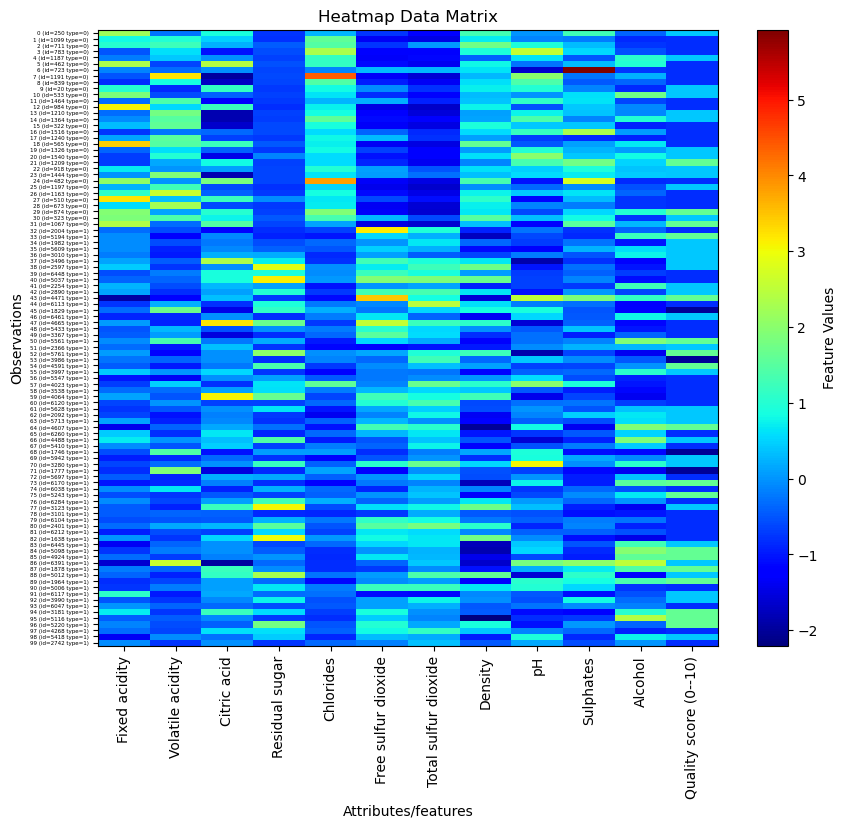

Data loaded


In [2]:
# create a list of string for the plots xticks/labels
idx = np.arange(0, N)
wine_id_type = [f"{a3} (id={a1} type={a2})" for a1, a2, a3 in zip(wine_id, y, idx)]
wine_id_type_vert = [f"(id={a1} type={a2}) {a3}" for a1, a2, a3 in zip(wine_id, y, idx)]


# %%
## TASK D: Optionally, standardize the attributes
# Try, once you have completed the script, to change this and see the effect on
# the associated distance in TASK H and I
if True:
    X = zscore(X, ddof=1)

# %%
## TASK E: Show the attributes for insights
print("This is X:")
print(X)

fig = plt.figure(figsize=(10, 8))
plt.imshow(X, aspect="auto", cmap="jet")
plt.colorbar(label="Feature Values")
plt.title("Heatmap Data Matrix")
plt.yticks(ticks=np.arange(len(y)), labels=wine_id_type, fontsize=4)
plt.xticks(
    ticks=np.arange(len(attribute_names)), labels=attribute_names, rotation="vertical"
)
# plt.xticks(ticks=np.arange(len(attribute_names)), labels=wine_id_type, fontsize=4)
plt.xlabel("Attributes/features")
plt.ylabel("Observations")
plt.show()

print("Data loaded")

In [5]:
# %%
## TASK F: Extract two wines and compute distances between a white and red wine (warm up exercise)
#
# Experiment with the various scaling factors and attributes being scale
# to see how the scaling affects the Lp distances (default L2)
#
# Note: you should think about ´x_red´ and ´x_white´ as vectors!
#
x_red = np.copy(
    X[0, :]
)  # note we make a copy to avoid messing with X in case we change x_white and x_red
x_white = np.copy(X[-1, :])
print("x_red: %s" % x_red)
print("x_white: %s" % x_white)
dist_firstandlast = np.linalg.norm(x_red - x_white, 2)  # L_2
print("Distance: %s  \n\n" % dist_firstandlast)

x_red: [ 2.19821546 -0.25494799  0.87705032 -0.7659143   0.26118449 -0.77204467
 -1.18541771  1.31309547 -0.00293709  1.25925902 -0.39197873  0.40382942]
x_white: [-0.05893675 -0.74760112 -0.02513223 -0.7659143  -0.33970008 -0.16695088
  0.35835154 -0.46117343  0.17328807 -0.57299617 -0.01104702 -0.8198961 ]
Distance: 4.176201439513424  




In [4]:
# Try to change the scale of one of the wines and see the effect on the distance
sf = 1000
x_red = sf * np.copy(X[0, :])
x_white = sf * np.copy(X[-1, :])
print("x_red: %s" % x_red)
print("x_white: %s" % x_white)
dist_firstandlast = np.linalg.norm(x_red - x_white, 2)  # L_2
print(dist_firstandlast)
print("Distance after scaling all attributes: %s \n\n" % dist_firstandlast)
print(f"Distance amplfied by {sf} times")

# Try to change the scale of one of the attributes in both wines and see the effect on the distance
x_red = np.copy(X[0, :])
x_white = np.copy(X[-1, :])
print("x_red: %s" % x_red)
print("x_white: %s" % x_white)
sf = 1000
x_white[1] = sf * x_white[1]
x_red[1] = sf * x_red[1]
print("x_red: %s" % x_red)
print("x_white: %s" % x_white)
dist_firstandlast = np.linalg.norm(x_red - x_white, 2)  # L_2
print("Distance after scaling one attribute: %s  \n\n" % dist_firstandlast)

x_red: [ 2198.21545944  -254.94799323   877.0503168   -765.91429724
   261.18449331  -772.04467352 -1185.41770984  1313.09547218
    -2.93708592  1259.25901555  -391.97873304   403.82942314]
x_white: [ -58.93675219 -747.60112023  -25.13222803 -765.91429724 -339.70007719
 -166.95087881  358.35154376 -461.17343317  173.28806916 -572.9961658
  -11.04701969 -819.89610153]
4176.201439513424
Distance after scaling all attributes: 4176.201439513424 


x_red: [ 2.19821546 -0.25494799  0.87705032 -0.7659143   0.26118449 -0.77204467
 -1.18541771  1.31309547 -0.00293709  1.25925902 -0.39197873  0.40382942]
x_white: [-0.05893675 -0.74760112 -0.02513223 -0.7659143  -0.33970008 -0.16695088
  0.35835154 -0.46117343  0.17328807 -0.57299617 -0.01104702 -0.8198961 ]
x_red: [ 2.19821546e+00 -2.54947993e+02  8.77050317e-01 -7.65914297e-01
  2.61184493e-01 -7.72044674e-01 -1.18541771e+00  1.31309547e+00
 -2.93708592e-03  1.25925902e+00 -3.91978733e-01  4.03829423e-01]
x_white: [-5.89367522e-02 -7.47601120e

<>:48: SyntaxWarning: invalid escape sequence '\i'
<>:48: SyntaxWarning: invalid escape sequence '\i'
/tmp/ipykernel_2884065/2031314879.py:48: SyntaxWarning: invalid escape sequence '\i'
  ax.set_title("$L_\infty$ norm", fontsize=16)


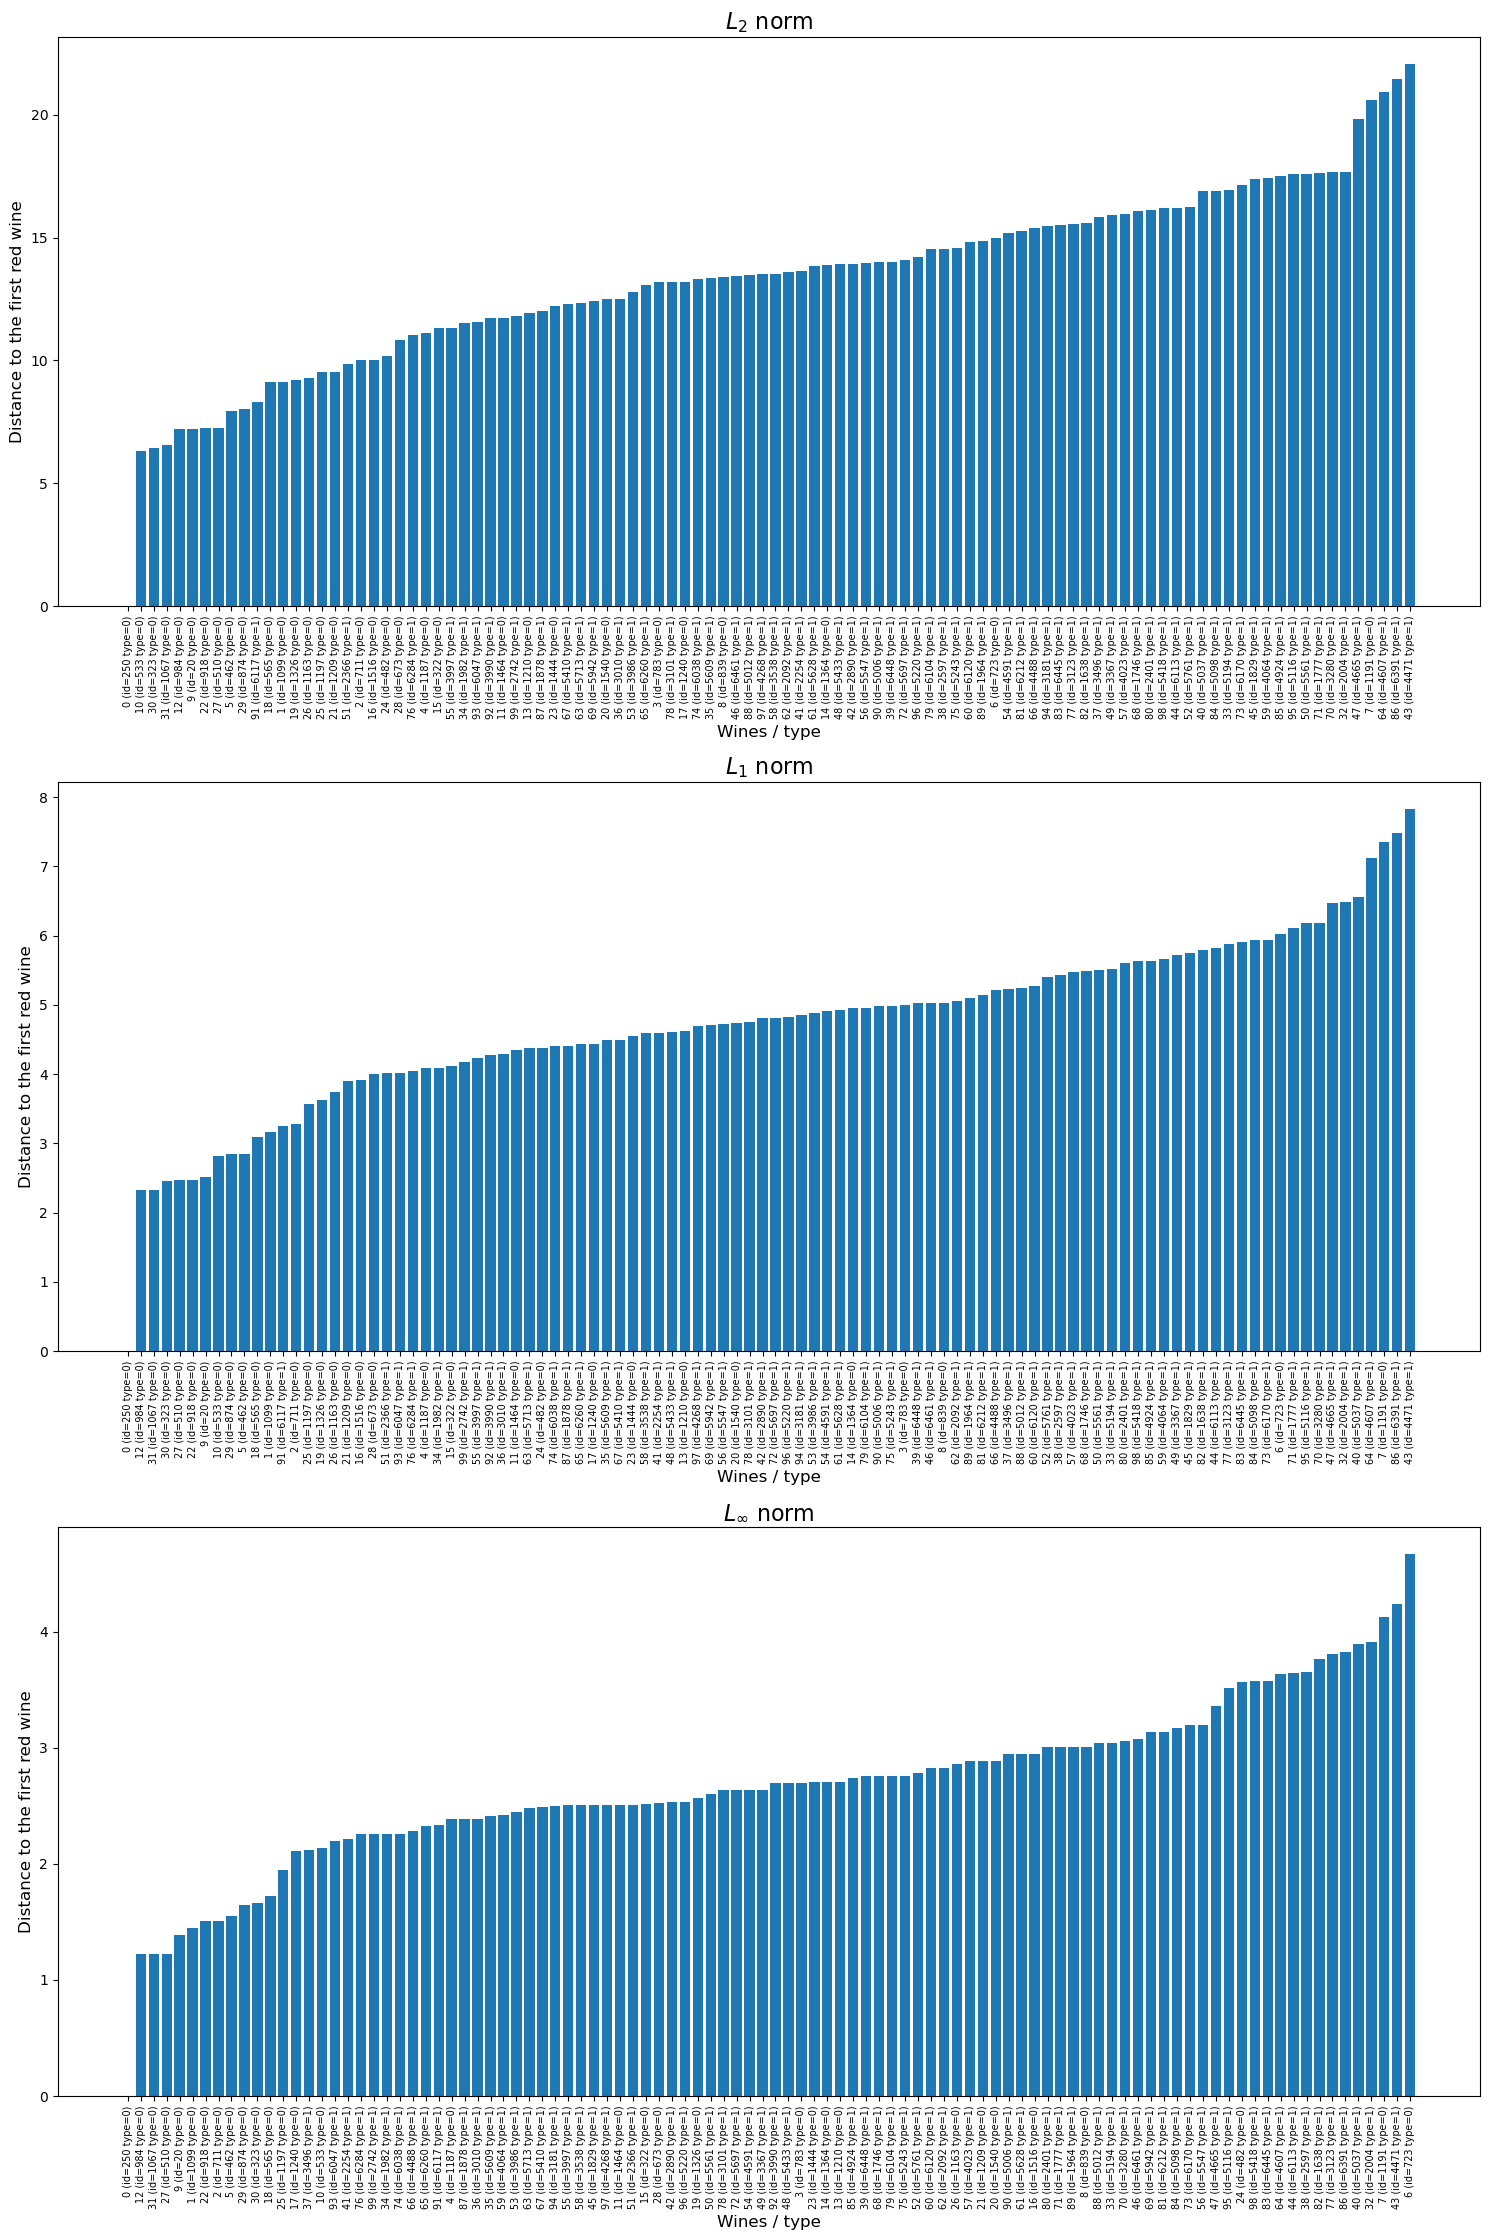

In [6]:
# %%
## TASK G: Compute and visualize distances between a wine and all others
#
x_red = np.copy(
    X[0, :]
)  # note we make a copy to avoid messing with X in case we change x_white and x_red
x_white = np.copy(X[-1, :])

# we must use axis=1 to get the right result, otherwise the matrix norm will be used
# (the matrix norm is calculated across the whole matrix, rather than across each row vector!)
red_L1 = np.linalg.norm(X - x_red, 1, axis=1)  # L_1
red_L2 = np.linalg.norm(X - x_red, 2, axis=1)  # L_2
red_Linf = np.linalg.norm(X - x_red, np.inf, axis=1)  # L_inf


# This is not important
def list_in_order(alist, order):  # credit JHW
    """Given a list 'alist' and a list of indices 'order'
    returns the list in the order given by the indices. Credit: JHW"""
    return [alist[i] for i in order]


def rank_plot(distances):  # credit JHW
    """
    A helper function. Credit: JHW
    """
    order = np.argsort(distances)  # find the ordering of the distances
    ax.bar(np.arange(len(distances)), distances[order])  # bar plot them
    ax.set_xlabel("Wines / type", fontsize=12)
    ax.set_ylabel("Distance to the first red wine", fontsize=12)
    ax.set_xticks(np.arange(N))
    # ax.set_frame_on(False) # remove frame
    # make sure the correct order is used for the labels!
    ax.set_xticklabels(
        list_in_order(wine_id_type, order), rotation="vertical", fontsize=7
    )


# Make the plots (not important how this happens)
fig = plt.figure(figsize=(15, 22.5))
ax = fig.add_subplot(3, 1, 1)
ax.set_title("$L_2$ norm", fontsize=16)
rank_plot(red_L1)
ax = fig.add_subplot(3, 1, 2)
ax.set_title("$L_1$ norm", fontsize=16)
rank_plot(red_L2)
ax = fig.add_subplot(3, 1, 3)
ax.set_title("$L_\infty$ norm", fontsize=16)
rank_plot(red_Linf)
plt.tight_layout()

In [12]:
X.shape

(100, 12)

In [20]:
# %%
## TASK H: Plot distances between all wines.
# Compute all the possible pairwise distances between rows and save
# in the following variables:
#
# ´pairwise_distances_L1´: An NxN matrix with distances between row i and row j using L1
# ´pairwise_distances_L2´: An NxN matrix with distances between row i and row j using L2
# ´pairwise_distances_Linf´: An NxN matrix with distances between row i and row j using Linf
#

pairwise_distances_L1 = np.zeros((N, N))
pairwise_distances_L2 = np.zeros((N, N))
pairwise_distances_Linf = np.zeros((N, N))
num_wines = X.shape[0]
for i in range(num_wines):
    for j in range(num_wines):
        if i == j:
            continue
        wine_i = X[i, :]
        wine_j = X[j, :]
        L1 = np.linalg.norm(wine_i - wine_j, 1)  # L_1
        L2 = np.linalg.norm(wine_i - wine_j, 2)  # L_2
        Linf = np.linalg.norm(wine_i - wine_j, np.inf)  # L_inf
        pairwise_distances_L1[i][j] = L1
        pairwise_distances_L2[i][j] = L2
        pairwise_distances_Linf[i][j] = Linf
pairwise_distances_L1, pairwise_distances_L1.shape

(array([[ 0.        ,  9.12948954, 10.03216994, ..., 13.49727067,
         16.1917483 , 11.78914198],
        [ 9.12948954,  0.        ,  6.04191414, ..., 11.61300526,
         17.27688064, 10.79631312],
        [10.03216994,  6.04191414,  0.        , ..., 12.42630817,
         15.30757613, 10.99878916],
        ...,
        [13.49727067, 11.61300526, 12.42630817, ...,  0.        ,
         10.43280858,  6.52828439],
        [16.1917483 , 17.27688064, 15.30757613, ..., 10.43280858,
          0.        ,  8.19667132],
        [11.78914198, 10.79631312, 10.99878916, ...,  6.52828439,
          8.19667132,  0.        ]]),
 (100, 100))

In [24]:
## Deepseek code
import numpy as np

# Assuming X is your data matrix with shape (N, D), where N is the number of wines and D is the number of features.

# Compute pairwise differences using broadcasting
diff = X[:, np.newaxis, :] - X[np.newaxis, :, :]

# Compute L1 distances
pairwise_distances_L1 = np.linalg.norm(diff, ord=1, axis=2)

# Compute L2 distances
pairwise_distances_L2 = np.linalg.norm(diff, ord=2, axis=2)

# Compute Linf distances
pairwise_distances_Linf = np.linalg.norm(diff, ord=np.inf, axis=2)

# If you want to ensure the diagonal is zero (distance from a point to itself is zero)
np.fill_diagonal(pairwise_distances_L1, 0)
np.fill_diagonal(pairwise_distances_L2, 0)
np.fill_diagonal(pairwise_distances_Linf, 0)

# Output the results
pairwise_distances_L1, pairwise_distances_L1.shape

(array([[ 0.        ,  9.12948954, 10.03216994, ..., 13.49727067,
         16.1917483 , 11.78914198],
        [ 9.12948954,  0.        ,  6.04191414, ..., 11.61300526,
         17.27688064, 10.79631312],
        [10.03216994,  6.04191414,  0.        , ..., 12.42630817,
         15.30757613, 10.99878916],
        ...,
        [13.49727067, 11.61300526, 12.42630817, ...,  0.        ,
         10.43280858,  6.52828439],
        [16.1917483 , 17.27688064, 15.30757613, ..., 10.43280858,
          0.        ,  8.19667132],
        [11.78914198, 10.79631312, 10.99878916, ...,  6.52828439,
          8.19667132,  0.        ]]),
 (100, 100))

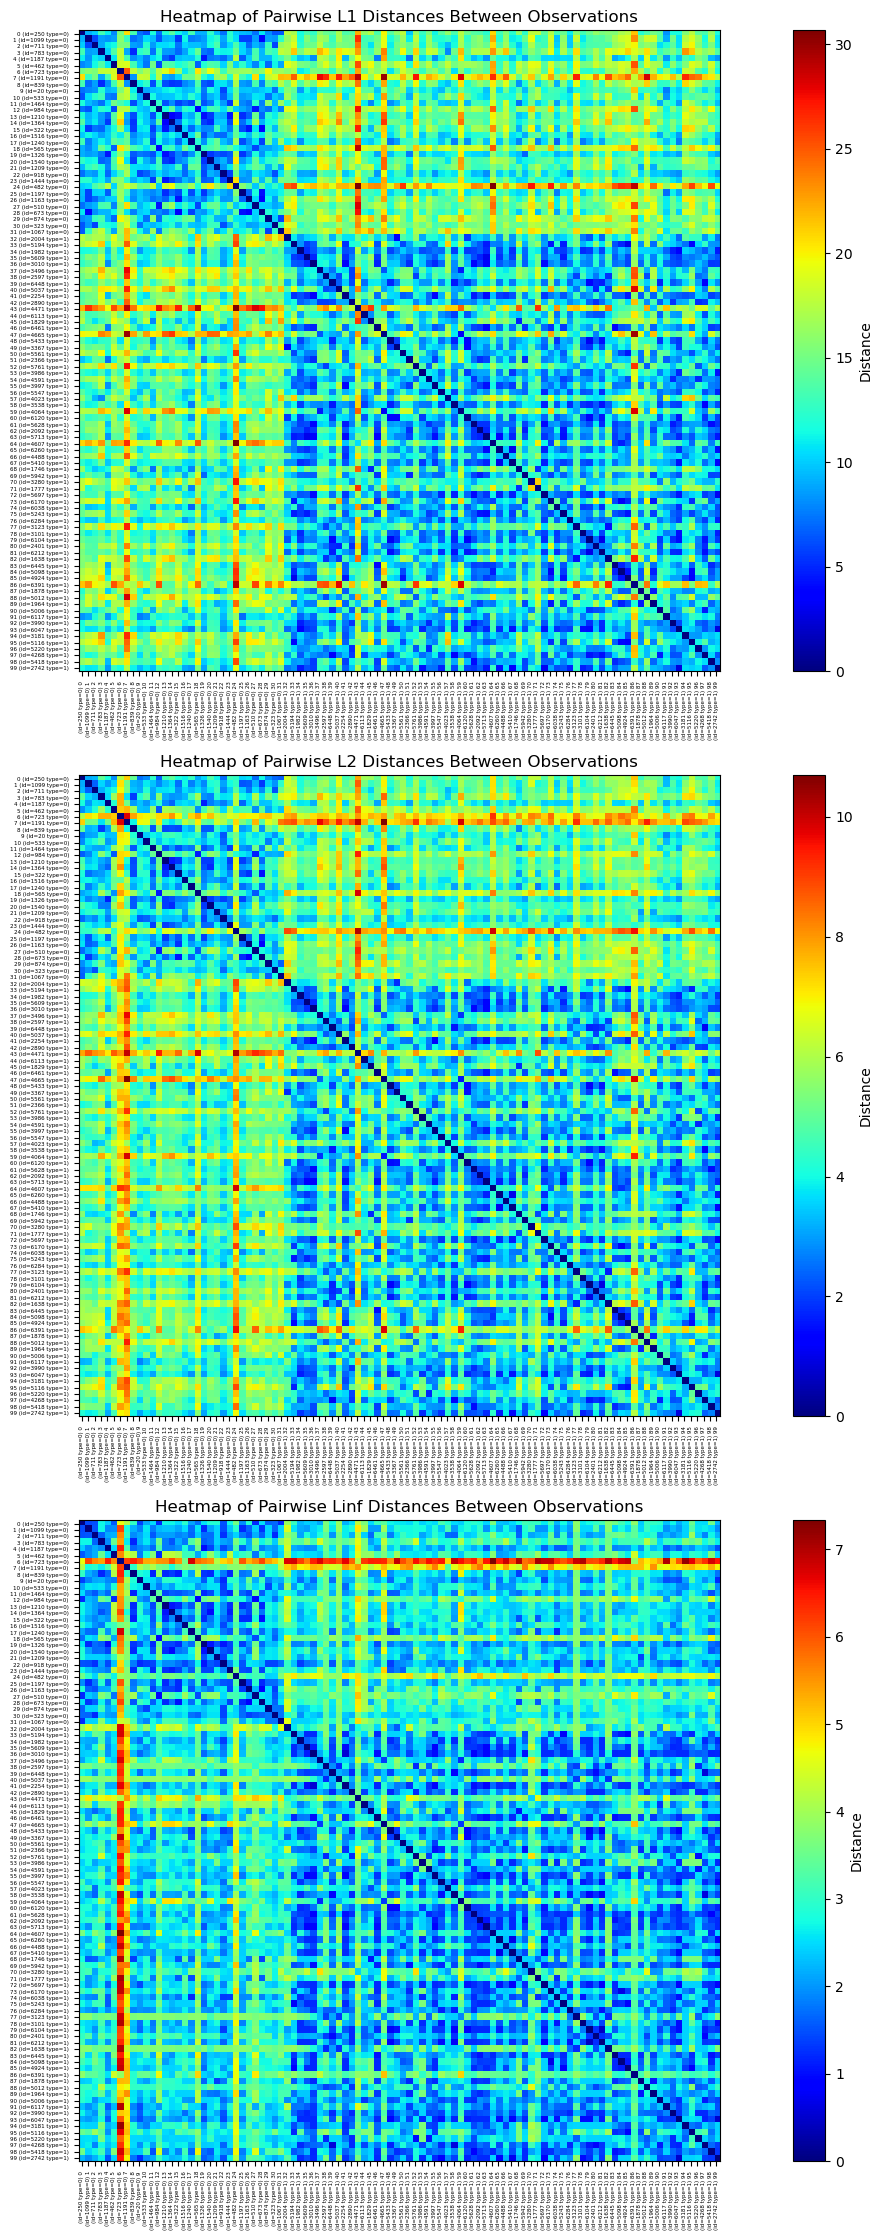

In [25]:
# Plot the pairwise distances as an image (not critical to understand the specific plotting code)
fig = plt.figure(figsize=(15, 22.5))
ax = fig.add_subplot(3, 1, 1)
cax = plt.imshow(pairwise_distances_L1, aspect="auto", cmap="jet")
plt.xticks(
    ticks=np.arange(len(y)), labels=wine_id_type_vert, fontsize=4, rotation="vertical"
)
plt.yticks(ticks=np.arange(len(y)), labels=wine_id_type, fontsize=4)
plt.title("Heatmap of Pairwise L1 Distances Between Observations")
plt.colorbar(cax, label="Distance")
ax.set_aspect("equal", "box")

ax = fig.add_subplot(3, 1, 2)
cax = plt.imshow(pairwise_distances_L2, aspect="auto", cmap="jet")
plt.xticks(
    ticks=np.arange(len(y)), labels=wine_id_type_vert, fontsize=4, rotation="vertical"
)
plt.yticks(ticks=np.arange(len(y)), labels=wine_id_type, fontsize=4)
plt.title("Heatmap of Pairwise L2 Distances Between Observations")
plt.colorbar(cax, label="Distance")
ax.set_aspect("equal", "box")

ax = fig.add_subplot(3, 1, 3)
cax = plt.imshow(pairwise_distances_Linf, aspect="auto", cmap="jet")
plt.xticks(
    ticks=np.arange(len(y)), labels=wine_id_type_vert, fontsize=4, rotation="vertical"
)
plt.yticks(ticks=np.arange(len(y)), labels=wine_id_type, fontsize=4)
plt.title("Heatmap of Pairwise Linf Distances Between Observations")
plt.colorbar(cax, label="Distance")
ax.set_aspect("equal", "box")
plt.tight_layout()

plt.show()

In [29]:
# %%
## TASK I (i.e. i): Compute the following distances and store them in the approiate variables:
#
# ´avg_interdist_white`: Average distance between all white wines based on the L1 norm (excluding distances to the same wine, i.e. 0)
# ´avg_interdist_red´: Average distance between all red wines based on the L1 norm (excluding distances to the same wine, i.e. 0)
# ´avg_intradist_red2white´: Average distance between white and red and white wines based on the L1 norm
#
# Hint: You can obtain the required information from the ´pairwise_distances´ variables
# above
#
# Question: Describe how the informaton about average inter and intra distances
# can be used in (automatically) disciminating between white and red wines?
#
# Question: Does it make a difference if you use the L1, L2 or Linf norm? Consider the
# relative difference between the inter and intra wine distances (p.s. it does...).
#
red_distance = pairwise_distances_L1[0, :]
white_distance = pairwise_distances_L1[-1, :]
intra_distance = np.linalg.norm(X[0, :] - X[-1, :], ord=1)
avg_interdist_white = np.mean(red_distance)  # replace np.nan with your estimate
avg_interdist_red = np.mean(white_distance)  # replace np.nan with your estimate
avg_intradist_red2white = np.mean(intra_distance) # replace np.nan with your estimate

avg_interdist_red, avg_interdist_white, avg_intradist_red2white

(9.628980094131295, 13.311295931778783, 11.789141982096197)